In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [2]:
!ls *.txt

datatest2.txt  datatest.txt  datatraining.txt


In [3]:
train_df = pd.read_csv('datatraining.txt')

In [4]:
test_df = pd.read_csv('datatest.txt')

In [5]:
train_df.shape

(8143, 7)

In [6]:
test_df.shape

(2665, 7)

Qn a. answer: There are **8143** training samples and **2665** test samples.

In [7]:
train_df = train_df.drop(['date'], axis=1)

In [8]:
test_df = test_df.drop(['date'], axis=1)

In [9]:
train_df.head(3)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,23.18,27.2720,426.0,721.25,0.004793,1
2,23.15,27.2675,429.5,714.00,0.004783,1
3,23.15,27.2450,426.0,713.50,0.004779,1


In [10]:
train_df['Occupancy'].unique()

array([1, 0])

In [11]:
test_df.head(3)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,23.700,26.272,585.200000,749.200000,0.004764,1
141,23.718,26.290,578.400000,760.400000,0.004773,1
142,23.730,26.230,572.666667,769.666667,0.004765,1


In [12]:
X_train = train_df.iloc[:,1:-1]

In [13]:
y_train = train_df.iloc[:,-1]

In [14]:
y_train = np.asarray(y_train).astype('int64').reshape((-1,1))

In [15]:
X_test = test_df.iloc[:,1:-1]

In [16]:
y_test = test_df.iloc[:,-1]

In [17]:
y_test = np.asarray(y_test).astype('int64').reshape((-1,1))

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8143, 4), (8143, 1), (2665, 4), (2665, 1))

In [19]:
# dividing training data to get validation data

In [20]:
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)

In [21]:
# Using MinMaxScaler to scale the data

In [22]:
scaler = MinMaxScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train)
# X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [24]:
y_test.shape

(2665, 1)

In [25]:
# changing labels to one hot

In [26]:
#y_train, y_valid, y_test = to_categorical(y_train), to_categorical(y_valid), to_categorical(y_test)

In [27]:
# y_train, y_test = to_categorical(y_train), to_categorical(y_test)

In [28]:
y_train[2:]

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [29]:
y_test.shape

(2665, 1)

In [30]:
# building the classification model

In [31]:
model_layers_list = []

In [32]:
# layers for first try
model_layers_list.append([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [33]:
# layers with changed number of hidden units in the second layer
model_layers_list.append([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [34]:
# layers with an added hidden unit as a third layer
model_layers_list.append([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(35, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [35]:
def process_data(data):
    return np.array(tf.argmax(data,axis=1),dtype='float32')

In [53]:
def execute_prediction_workflow(model_layer):
  print(f'Trying for: {model_layer}')
  model_class = ''
  model_class = tf.keras.Sequential(model_layer)
  
  # print(model_class.summary())
  
  model_class.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
  
  
  fitModel = model_class.fit(X_train_scaled, y_train,
                epochs=51, validation_split=0.3, 
                # verbose=0
                )
  
  y_predict = model_class.predict(X_test_scaled[:1,:])

  print(f'Predict shape: {y_predict.shape}')
  print(f'Prediction for record: {y_predict[0]}')
  print(f'Classification for 1st record: {np.argmax(y_predict[0])}')

  train_loss, train_acc = model_class.evaluate(X_train_scaled, y_train)
  test_loss, test_acc = model_class.evaluate(X_test_scaled, y_test)

  print(f'Classification accuracy on training data: {train_acc}')
  print(f'Classification accuracy on test data: {test_acc}')

  test_predict = model_class.predict(X_test_scaled)
  test_predict_labels = np.argmax(test_predict, axis=1)
  conf_matrix = tf.math.confusion_matrix(labels=y_test, predictions=test_predict_labels)
  print(f'Confusion matrix on predictions: {conf_matrix}')

  fig = plt.figure(figsize = (15,4))
  fig.add_subplot(121)
  plt.plot(fitModel.history['accuracy'])
  plt.plot(fitModel.history['val_accuracy'])
  plt.legend(['Training Accuracy','Validation Accuracy'])
  plt.title('Training and validation accuracy')
  plt.xlabel('Epoch #')
  plt.ylabel('Accuracy')

  fig.add_subplot(122)
  plt.plot(fitModel.history['loss'])
  plt.plot(fitModel.history['val_loss'])
  plt.legend(['Training Loss','Validation Loss'])
  plt.title('Training and validation Loss')
  plt.xlabel('Epoch #')
  plt.ylabel('Loss')

  return model_class



**Testing our model with the first set of layers - Architecture: 10-h1-1**



Trying for: [<keras.layers.core.dense.Dense object at 0x7f7bf6d06ed0>, <keras.layers.core.dense.Dense object at 0x7f7bf64e9790>, <keras.layers.core.dense.Dense object at 0x7f7bf64e9f10>]
Epoch 1/51
179/179 [==============================] - 2s 4ms/step - loss: 0.0290 - accuracy: 0.9898 - val_loss: 2.0345 - val_accuracy: 0.9247
Epoch 2/51
179/179 [==============================] - 1s 3ms/step - loss: 0.0290 - accuracy: 0.9905 - val_loss: 1.8887 - val_accuracy: 0.9284
Epoch 3/51
179/179 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.9891 - val_loss: 1.7944 - val_accuracy: 0.9288
Epoch 4/51
179/179 [==============================] - 1s 3ms/step - loss: 0.0286 - accuracy: 0.9889 - val_loss: 1.7353 - val_accuracy: 0.9304
Epoch 5/51
179/179 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9900 - val_loss: 1.8770 - val_accuracy: 0.9284
Epoch 6/51
179/179 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9893 - v

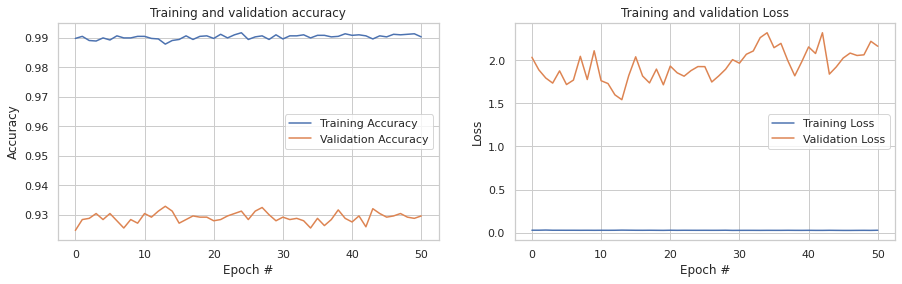

In [54]:
model_class = execute_prediction_workflow(model_layers_list[0])
model_class.summary()

**Testing our model with varying the hidden units. Architecture: 10-h1-1**



Trying for: [<keras.layers.core.dense.Dense object at 0x7f7bf64f0e10>, <keras.layers.core.dense.Dense object at 0x7f7bf5b6ef90>, <keras.layers.core.dense.Dense object at 0x7f7bf64f0e90>]
Epoch 1/51
179/179 [==============================] - 1s 4ms/step - loss: 0.0392 - accuracy: 0.9865 - val_loss: 0.2676 - val_accuracy: 0.9366
Epoch 2/51
179/179 [==============================] - 1s 3ms/step - loss: 0.0386 - accuracy: 0.9865 - val_loss: 0.2971 - val_accuracy: 0.9308
Epoch 3/51
179/179 [==============================] - 1s 3ms/step - loss: 0.0385 - accuracy: 0.9858 - val_loss: 0.3154 - val_accuracy: 0.9292
Epoch 4/51
179/179 [==============================] - 0s 3ms/step - loss: 0.0383 - accuracy: 0.9863 - val_loss: 0.3236 - val_accuracy: 0.9243
Epoch 5/51
179/179 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 0.9863 - val_loss: 0.3656 - val_accuracy: 0.9259
Epoch 6/51
179/179 [==============================] - 1s 3ms/step - loss: 0.0367 - accuracy: 0.9858 - v

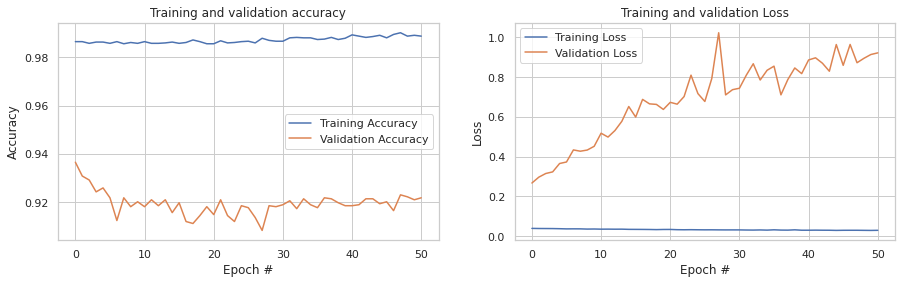

In [55]:
model_class = execute_prediction_workflow(model_layers_list[1])
model_class.summary()

**Testing our model with adding a hidden layer. Architecture: 10-h1-h2-1**

Trying for: [<keras.layers.core.dense.Dense object at 0x7f7bf64f27d0>, <keras.layers.core.dense.Dense object at 0x7f7bf64f3090>, <keras.layers.core.dense.Dense object at 0x7f7bf64f2890>, <keras.layers.core.dense.Dense object at 0x7f7bf64f2c90>]
Epoch 1/51
179/179 [==============================] - 1s 4ms/step - loss: 0.0274 - accuracy: 0.9907 - val_loss: 0.0986 - val_accuracy: 0.9623
Epoch 2/51
179/179 [==============================] - 1s 3ms/step - loss: 0.0285 - accuracy: 0.9911 - val_loss: 0.0912 - val_accuracy: 0.9832
Epoch 3/51
179/179 [==============================] - 1s 3ms/step - loss: 0.0273 - accuracy: 0.9912 - val_loss: 0.0804 - val_accuracy: 0.9853
Epoch 4/51
179/179 [==============================] - 1s 3ms/step - loss: 0.0274 - accuracy: 0.9912 - val_loss: 0.0855 - val_accuracy: 0.9849
Epoch 5/51
179/179 [==============================] - 1s 3ms/step - loss: 0.0295 - accuracy: 0.9900 - val_loss: 0.0641 - val_accuracy: 0.9881
Epoch 6/51
179/179 [=========================

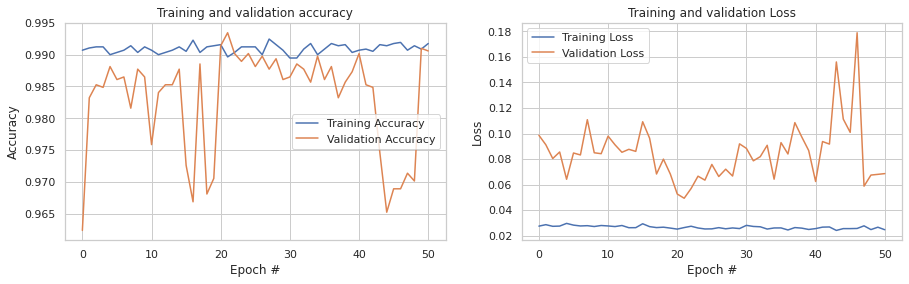

In [56]:
model_class = execute_prediction_workflow(model_layers_list[2])
model_class.summary()

**Adding an additional hidden layer had a very little effect on the accuracy of the test data.***

